# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


In [1]:
import torch as th

In [ ]:
th.__version__

'2.0.1+cu118'

In [ ]:
!python --version

Python 3.10.12


## Задачи для совместного разбора

1\. Создайте тензор и исследуйте его основные характеристики

In [ ]:
t = th.randint(0,11,size=(10,), dtype=th.float32)
t

tensor([ 3.,  6.,  4.,  1., 10.,  1., 10.,  6.,  9.,  9.])

In [ ]:
t.dtype

torch.int64

In [ ]:
t.size(), t.shape

(torch.Size([10]), torch.Size([10]))

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [ ]:
t = th.randint(0,11,size=(10,5,5), dtype=th.float32)
t[0,0,0], t[0,0,0].item()

(tensor(3.), 3.0)

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [ ]:
t = th.randint(0,11,size=(5,5), dtype=th.float32)
t

tensor([[ 0.,  0.,  1., 10.,  5.],
        [ 8., 10.,  8.,  6.,  6.],
        [ 5.,  8., 10.,  7.,  7.],
        [ 3.,  4.,  2.,  8.,  8.],
        [ 5.,  0.,  3.,  2.,  9.]])

In [ ]:
t + 100

tensor([[100., 100., 101., 110., 105.],
        [108., 110., 108., 106., 106.],
        [105., 108., 110., 107., 107.],
        [103., 104., 102., 108., 108.],
        [105., 100., 103., 102., 109.]])

In [ ]:
t2 = th.ones(5)
t2

tensor([1., 1., 1., 1., 1.])

In [ ]:
t+t2

tensor([[ 1.,  1.,  2., 11.,  6.],
        [ 9., 11.,  9.,  7.,  7.],
        [ 6.,  9., 11.,  8.,  8.],
        [ 4.,  5.,  3.,  9.,  9.],
        [ 6.,  1.,  4.,  3., 10.]])

4\. Исследуйте совместимость `torch` с `numpy` и `sklearn`

In [ ]:
import numpy as np

In [ ]:
np.sin(t)

tensor([[ 0.0000,  0.0000,  0.8415, -0.5440, -0.9589],
        [ 0.9894, -0.5440,  0.9894, -0.2794, -0.2794],
        [-0.9589,  0.9894, -0.5440,  0.6570,  0.6570],
        [ 0.1411, -0.7568,  0.9093,  0.9894,  0.9894],
        [-0.9589,  0.0000,  0.1411,  0.9093,  0.4121]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MinMaxScaler().fit_transform(t)

array([[0.        , 0.        , 0.        , 1.        , 0.        ],
       [1.        , 1.        , 0.77777778, 0.5       , 0.25      ],
       [0.625     , 0.8       , 1.        , 0.625     , 0.5       ],
       [0.375     , 0.4       , 0.11111111, 0.75      , 0.75      ],
       [0.625     , 0.        , 0.22222222, 0.        , 1.        ]])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

In [ ]:
nrow = 100000
ncol = 10
z = th.zeros(nrow,ncol)
z[th.arange(nrow), th.randint(0,10,size=(nrow,))] = 1
z[:5]

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
z.shape

torch.Size([100000, 10])

In [ ]:
z.mean(dim=0) # sum/num_rows

tensor([0.0999, 0.1002, 0.1006, 0.1014, 0.0997, 0.0979, 0.1010, 0.1009, 0.0988,
        0.0998])

In [ ]:
z.mean(dim=0).sum()

tensor(1.0000)

In [ ]:
(z.sum(dim=1) == 1).all()

tensor(True)

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над побочной диагональю.

In [ ]:
x, y = th.meshgrid(th.arange(9,-1,-1), th.arange(10), indexing='ij')
x > y

tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False],
        [ True,  True,  True,  True,  True,  True,  True, False, False, False],
        [ True,  True,  True,  True,  True,  True, False, False, False, False],
        [ True,  True,  True,  True,  True, False, False, False, False, False],
        [ True,  True,  True,  True, False, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False, False, False],
        [ True,  True, False, False, False, False, False, False, False, False],
        [ True, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False]])

In [ ]:
9-x[x>y]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8])

In [ ]:
y[x>y]

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6,
        0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0])

In [ ]:
t2 = th.randint(0,11,size=(10,10))
t2

tensor([[ 2,  1,  0,  8, 10,  8,  3,  9, 10,  6],
        [10,  3,  4,  1,  3,  6,  3,  3,  3,  9],
        [ 8,  6,  2,  0,  6,  6,  8,  6,  4,  9],
        [ 2,  4,  3, 10,  0, 10,  9,  9,  2,  4],
        [ 2,  4,  1,  1,  1,  5,  8,  6,  3,  2],
        [ 5,  1, 10,  5,  8,  5,  7,  9,  2,  4],
        [ 2,  7, 10,  4,  4,  5,  7, 10,  7,  5],
        [ 5,  0,  8,  3, 10,  0,  7,  0,  3,  4],
        [ 0,  1,  6,  5,  6,  2,  9, 10,  5,  0],
        [ 7, 10, 10,  6,  8,  3,  9,  9,  4,  0]])

In [ ]:
t2[9-x[x>y],y[x>y]]

tensor([ 2,  1,  0,  8, 10,  8,  3,  9, 10, 10,  3,  4,  1,  3,  6,  3,  3,  8,
         6,  2,  0,  6,  6,  8,  2,  4,  3, 10,  0, 10,  2,  4,  1,  1,  1,  5,
         1, 10,  5,  2,  7, 10,  5,  0,  0])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

In [ ]:
row, col = 5, 5
t3 = th.randint(0,101,size=(row, col))
id_max = t3.argmax()
t3, id_max

(tensor([[18, 48, 65, 37, 59],
         [83, 84, 21, 27, 49],
         [92, 38,  8, 52, 39],
         [65, 44, 21, 38, 11],
         [44, 34,  0, 56, 21]]),
 tensor(10))

In [ ]:
x3, y3 = id_max//row, id_max%col
x3, y3

(tensor(2), tensor(0))

In [ ]:
idx = th.arange(row*col).reshape(row,col)
idx

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
nidx = idx[max(x3,1)-1:x3+2,max(y3,1)-1:y3+2]
nidx

tensor([[ 5,  6],
        [10, 11],
        [15, 16]])

In [ ]:
z3 = th.ones(row*col)
z3[nidx.flatten()] = 0
z3

tensor([1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1.])

In [ ]:
t3.flatten()[z3==1] = 0
t3

tensor([[ 0,  0,  0,  0,  0],
        [83, 84,  0,  0,  0],
        [92, 38,  0,  0,  0],
        [65, 44,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])

In [ ]:
def task3(tens):
  tens_copy = tens.clone()
  row, col = tens.shape
  id_max = tens_copy.argmax()
  x3, y3 = id_max//row, id_max%col

  idx = th.arange(row*col).reshape(row,col)
  nidx = idx[max(x3,1)-1:x3+2,max(y3,1)-1:y3+2]

  ones = th.ones(row*col)
  ones[nidx.flatten()] = 0

  tens_copy.flatten()[z3==1] = 0
  return tens_copy

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

In [ ]:
row4, col4 = 5, 5
t4 = th.randint(0,101,size=(row4, col4))
t4_res = task3(t4)
t4_merged = th.stack([t4,t4_res])
t4_merged

tensor([[[ 3, 59, 94, 84, 12],
         [88, 82, 94, 11, 89],
         [47, 50, 38, 25, 97],
         [26, 98, 80, 44, 60],
         [72, 84, 64, 59,  5]],

        [[ 0,  0,  0,  0,  0],
         [88, 82,  0,  0,  0],
         [47, 50,  0,  0,  0],
         [26, 98,  0,  0,  0],
         [ 0,  0,  0,  0,  0]]])

In [ ]:
t4_merged.shape

torch.Size([2, 5, 5])

In [ ]:
th.save(t4_merged, 'tensor.pt')

In [ ]:
t4_loaded = th.load('tensor.pt')
t4_loaded

tensor([[[ 3, 59, 94, 84, 12],
         [88, 82, 94, 11, 89],
         [47, 50, 38, 25, 97],
         [26, 98, 80, 44, 60],
         [72, 84, 64, 59,  5]],

        [[ 0,  0,  0,  0,  0],
         [88, 82,  0,  0,  0],
         [47, 50,  0,  0,  0],
         [26, 98,  0,  0,  0],
         [ 0,  0,  0,  0,  0]]])

In [ ]:
(t4_merged == t4_loaded).all()

tensor(True)

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

In [ ]:
t5 = th.randint(1,11,size=(2,3,5,5), dtype=th.float32)
t5

tensor([[[[10.,  6.,  9.,  6.,  1.],
          [ 4.,  2.,  4.,  8.,  7.],
          [ 1.,  1.,  6.,  2.,  6.],
          [ 1.,  3.,  6.,  9.,  3.],
          [ 8.,  3.,  9.,  9.,  4.]],

         [[ 2.,  3.,  7.,  1.,  7.],
          [ 3.,  3.,  3.,  3.,  7.],
          [ 6.,  8.,  4.,  4.,  6.],
          [ 3.,  6.,  9.,  1., 10.],
          [ 4.,  4.,  7.,  1., 10.]],

         [[ 5.,  7.,  2.,  8.,  3.],
          [ 2.,  1.,  3.,  1.,  5.],
          [ 3.,  1.,  3., 10.,  9.],
          [ 8.,  5.,  4.,  7.,  5.],
          [10.,  3.,  1., 10.,  5.]]],


        [[[ 2.,  1.,  6.,  2.,  6.],
          [ 5.,  4.,  9.,  9., 10.],
          [ 7.,  6.,  8., 10.,  3.],
          [ 9.,  4.,  6.,  3.,  3.],
          [ 8.,  6.,  2.,  9.,  2.]],

         [[ 3.,  3.,  4.,  7.,  6.],
          [ 5.,  5.,  3.,  5.,  4.],
          [ 5.,  3.,  7.,  1.,  6.],
          [ 9.,  8.,  9.,  3.,  1.],
          [ 9.,  4.,  3.,  1.,  1.]],

         [[ 3.,  5.,  7., 10.,  9.],
          [ 3.,  7.,  7., 

In [ ]:
res5 = t5.mean(dim=(2,3), keepdim=True).flatten(2)
res5

tensor([[[5.1200],
         [4.8800],
         [4.8400]],

        [[5.6000],
         [4.6000],
         [6.0400]]])

In [ ]:
res5.shape

torch.Size([2, 3, 1])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

In [2]:
from torch.distributions.exponential import Exponential
import matplotlib.pyplot as plt

In [3]:
N6 = 100_000_000
lambda6 = 5

t6 = Exponential(rate=lambda6).sample([N6])
t6

tensor([0.1848, 0.2893, 0.0447,  ..., 0.2499, 0.3662, 0.0227])

In [4]:
t6.mean(), t6.var()

(tensor(0.2000), tensor(0.0400))

In [5]:
%%time
cnt, x = th.histogram(t6, bins=10000, range=(0.,5.))

CPU times: user 1.62 s, sys: 0 ns, total: 1.62 s
Wall time: 1.62 s


<BarContainer object of 10000 artists>

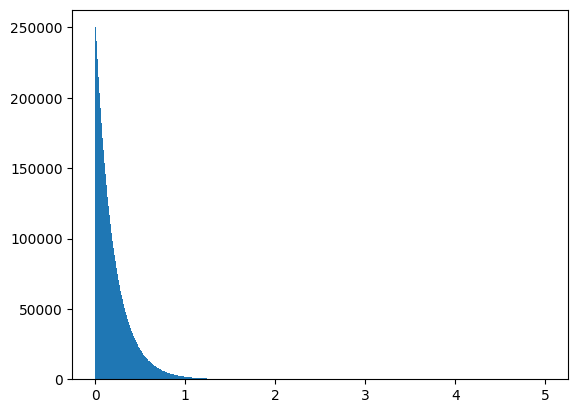

In [6]:
plt.bar((x[1:]+x[:-1])/2, cnt, align='center', width=0.01)

### **GPU**

In [28]:
th.cuda.is_available()

True

In [29]:
t6_cuda = t6.to(device="cuda")

In [30]:
%%time
cnt_cuda = th.histc(t6_cuda, bins=10000, max=5)

CPU times: user 581 µs, sys: 62 µs, total: 643 µs
Wall time: 373 µs


<BarContainer object of 10000 artists>

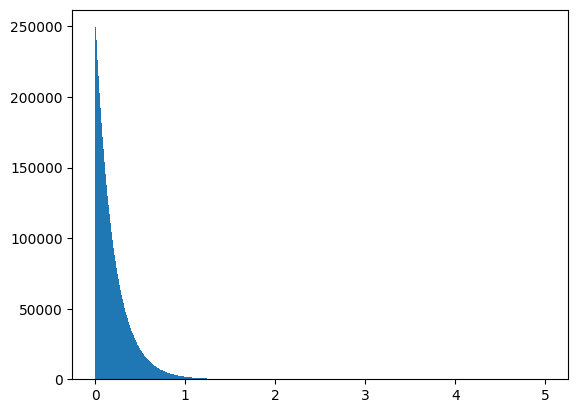

In [31]:
plt.bar((th.arange(0,5,0.0005)), cnt_cuda.cpu(), align='center', width=0.01)

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите столбцы со второго по четвертый; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

In [ ]:
t7 = th.randint(0,256,size=(10,6,6,3))
t7.shape

torch.Size([10, 6, 6, 3])

In [ ]:
t7[:,2:,:,0] = 0
t7[:,1:4,:,1] = 0
t7[:,4:6,:,2] = 0
t7

tensor([[[[ 13, 148,  31],
          [199, 127, 167],
          [168,  37,  92],
          [ 22, 177,  21],
          [247, 157,  89],
          [148,  68,   7]],

         [[229,   0, 235],
          [162,   0,  52],
          [157,   0, 172],
          [131,   0, 131],
          [124,   0, 241],
          [ 40,   0, 180]],

         [[  0,   0, 241],
          [  0,   0, 166],
          [  0,   0,  98],
          [  0,   0,  73],
          [  0,   0, 181],
          [  0,   0, 164]],

         [[  0,   0,  64],
          [  0,   0,  14],
          [  0,   0, 171],
          [  0,   0,  93],
          [  0,   0,  14],
          [  0,   0,  72]],

         [[  0,  65,   0],
          [  0, 108,   0],
          [  0, 232,   0],
          [  0, 173,   0],
          [  0,  80,   0],
          [  0, 165,   0]],

         [[  0, 255,   0],
          [  0,  88,   0],
          [  0, 233,   0],
          [  0,  45,   0],
          [  0,  90,   0],
          [  0, 124,   0]]],


        [[[224

In [ ]:
t7.shape

torch.Size([10, 6, 6, 3])

## Обратная связь
- [ ] Хочу получить обратную связь по решению